# T-SNE vizualizatio

References:
- [Paper](https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf)
- [Useful post](https://distill.pub/2016/misread-tsne/)

In [2]:
#%matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
import os
import cv2
from shutil import copyfile,move

from sklearn.manifold import TSNE

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from   sklearn.decomposition import PCA
from   sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding
from   sklearn.preprocessing import StandardScaler

#np.set_printoptions(suppress=True)
#np.set_printoptions(precision=4)
plt_style = 'seaborn-talk'
import seaborn as sns

In [3]:
image_size = (224,224)

In [4]:
test_dir = 'data/training_folder/test'
model_path = 'weights/vgg16_transfer_weights.h5'

Run the predictions on images

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input as preprocess_input_vgg
from keras.models import load_model

model = load_model(model_path)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg) 

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=image_size,
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator,steps=nb_samples)

Using TensorFlow backend.


Found 340 images belonging to 17 classes.


Now we will apply TSNE to obtain an approximation of embedding in 2-dimentional space

In [6]:
X = np.array(predict)

In [7]:
tsne_model = TSNE(perplexity=20, n_components=2, init='pca', n_iter=500, random_state=23)
new_values = tsne_model.fit_transform(X)

In [8]:
xy_df = pd.DataFrame(new_values, columns=["x", "y"])
xy_df['label'] = test_generator.classes
xy_df.head()

,x,y,label
0,-10.678357,-9.007667,0
1,-51.979488,-14.819235,0
2,-13.041031,-18.812185,0
3,-13.388890,-10.948599,0
4,-20.643547,-15.290283,0


(-69.1304197684041, 84.60326925622287, -90.7802523898383, 83.48911313615592)

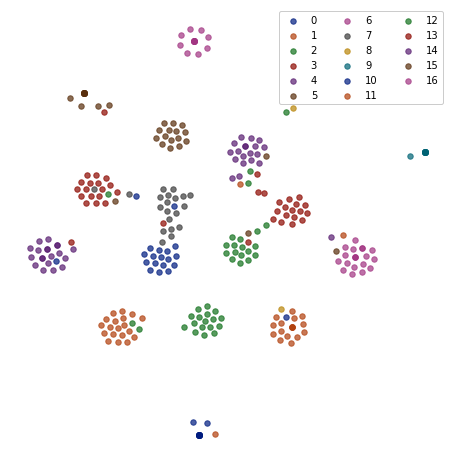

In [10]:
sns.lmplot( x="x", y="y", data=xy_df, fit_reg=False, hue='label', legend=False,
           palette = "dark",
           height = 7,
           scatter_kws={'alpha':0.7, 's':30}
          )
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right', 
          fontsize='medium',
          markerscale = 1,
           fancybox=True,
          framealpha=1,
            ncol=3,
          )

plt.axis('off')

#plt.savefig("tsne_viz.eps")